# 生成特征堆栈
机器学习算法如随机森林分类器，例如在[APOC](https://github.com/haesleinhuepf/apoc)中实现的那样，使用特征堆栈进行像素分类。特征堆栈是相同大小（2D或3D）的图像列表。APOC提供了一个用于生成特征堆栈的实用函数。它以图像和特征规格字符串作为输入，产生一个特征堆栈。

让我们从加载一个示例图像开始，并创建一个用于可视化的便捷函数：

In [1]:
from skimage.io import imread, imshow
import numpy as np
import apoc
import matplotlib.pyplot as plt

我们再次从斑点示例图像开始。

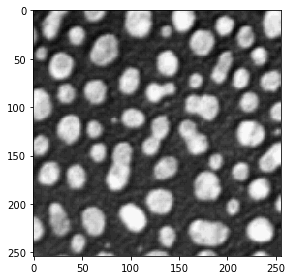

In [2]:
image = imread('../../data/blobs.tif')
imshow(image)

我们还定义了一个用于可视化特征堆栈的实用函数。

In [3]:
def visualize(feature_stack):
    """
    Shows lists of images in rows of three
    """
    if len(feature_stack) == 0:
        return
    
    # show feature images
    width = 3
    height = int(len(feature_stack) / 3)
    if height * width < len(feature_stack):
        height = height + 1    
    
    fig, axes = plt.subplots(height, width, figsize=(10,10))

    for i, f in enumerate(feature_stack):
        if height > 1:
            axes[int(i / 3)][i % 3].imshow(f, cmap=plt.cm.gray)
        else:
            axes[i].imshow(f, cmap=plt.cm.gray)

    w = len(feature_stack) % width
    if w > 0:
        w = width - w
        while (w > 0):
            if height > 1:
                axes[-1][width - w].set_visible(False)
            else:
                axes[width - w].set_visible(False)
            w = w - 1

    plt.show()        

## 特征堆栈
特征堆栈是2D或3D图像的列表，通常从原始图像派生而来。如果你不指定任何特征规格，将生成一个包含原始图像、模糊版本和边缘图像的堆栈：

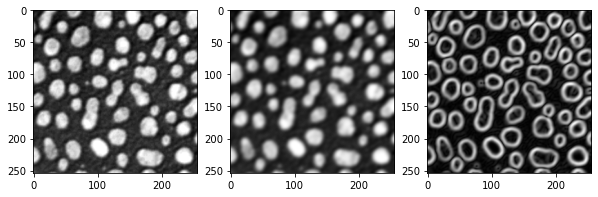

In [4]:
feature_stack = apoc.generate_feature_stack(image)

visualize(feature_stack)

还有一些预定义的特征集：

PredefinedFeatureSet.custom
PredefinedFeatureSet.small_quick


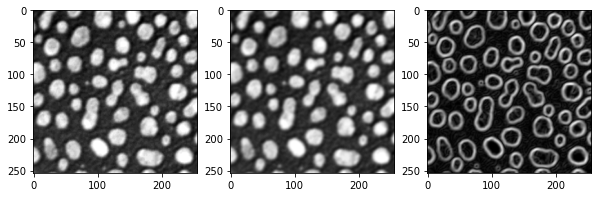

PredefinedFeatureSet.medium_quick


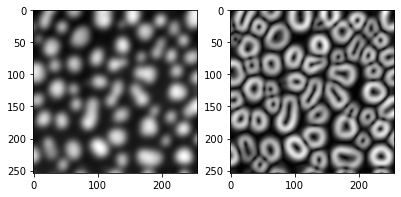

PredefinedFeatureSet.large_quick


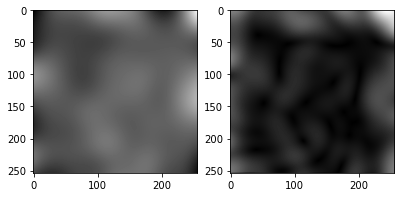

PredefinedFeatureSet.small_dog_log


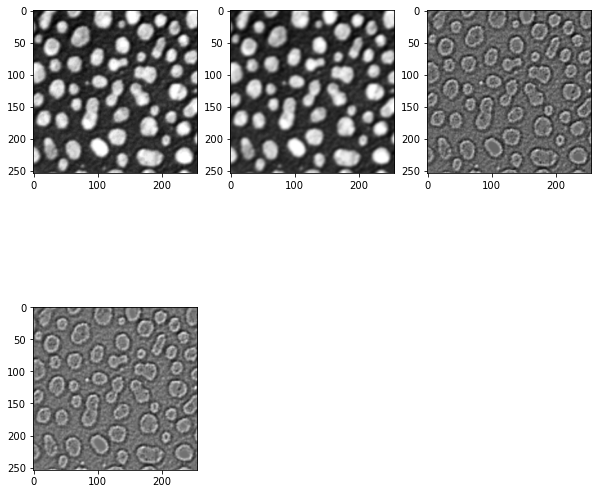

PredefinedFeatureSet.medium_dog_log


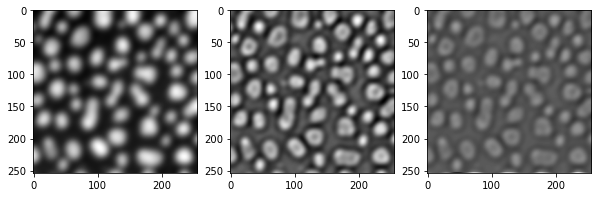

PredefinedFeatureSet.large_dog_log


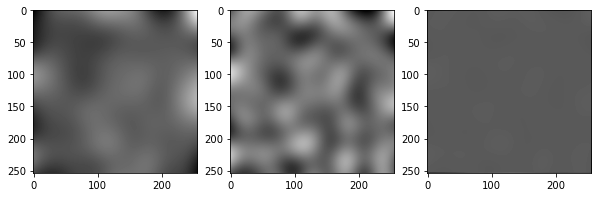

PredefinedFeatureSet.object_size_1_to_2_px


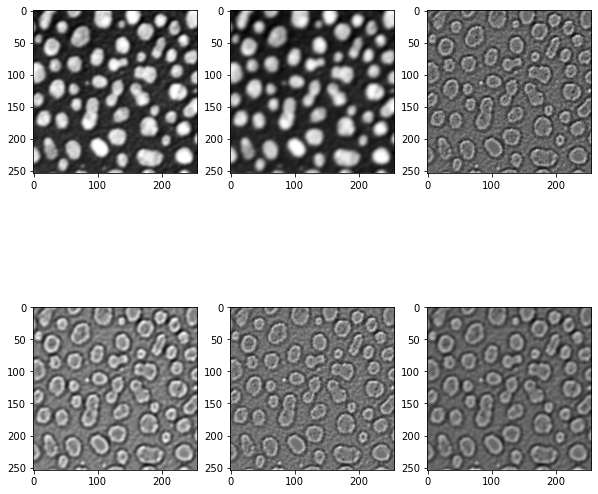

PredefinedFeatureSet.object_size_1_to_5_px


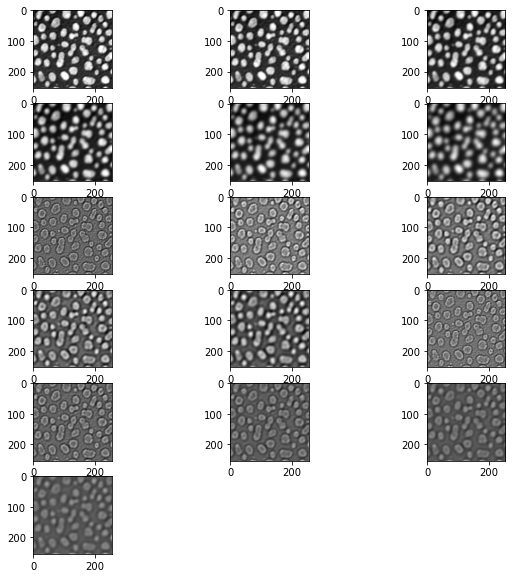

PredefinedFeatureSet.object_size_3_to_8_px


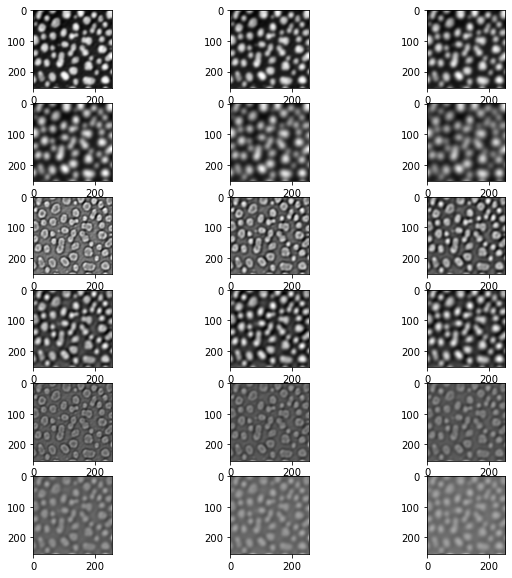

PredefinedFeatureSet.object_size_5_to_10_px


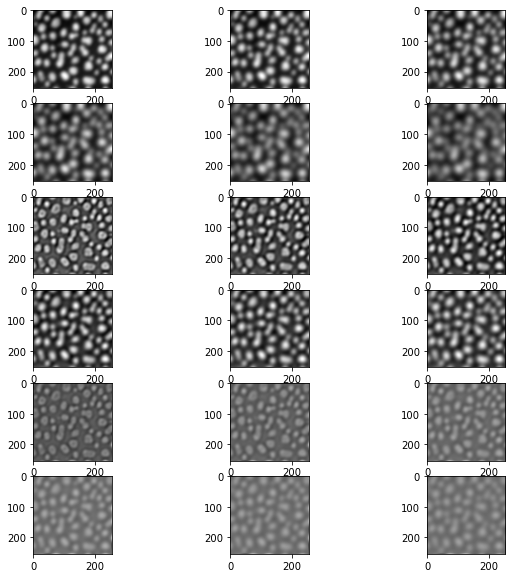

PredefinedFeatureSet.object_size_10_to_15_px


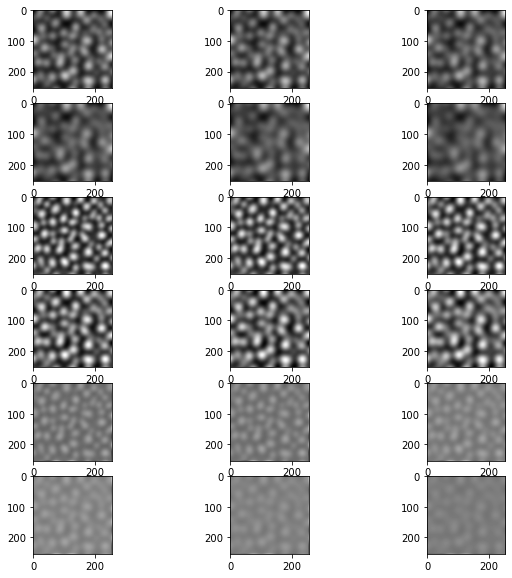

PredefinedFeatureSet.object_size_15_to_20_px


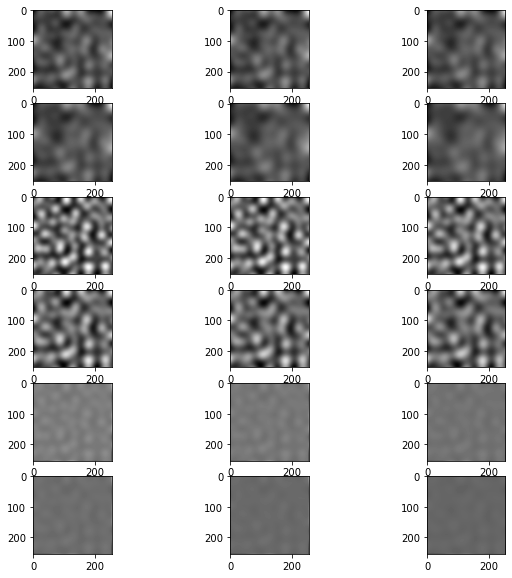

PredefinedFeatureSet.object_size_20_to_25_px


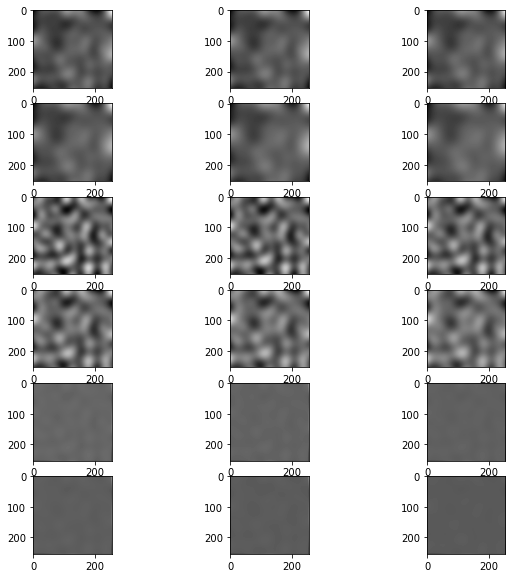

PredefinedFeatureSet.object_size_25_to_50_px


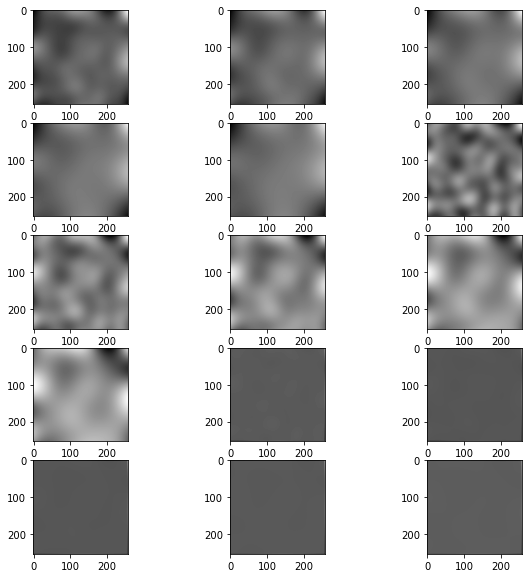

PredefinedFeatureSet.object_size_50_to_100_px


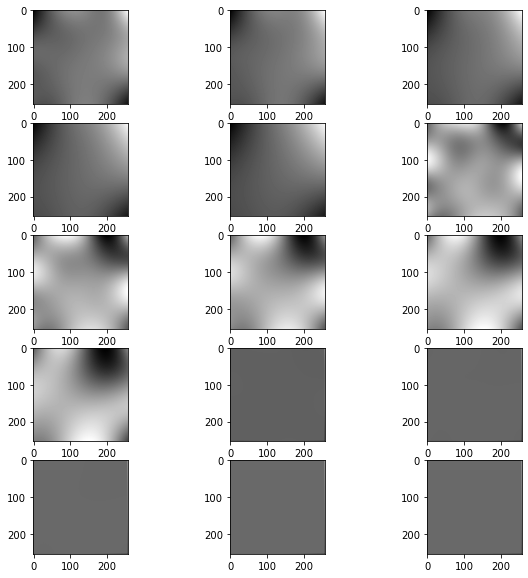

In [5]:
for f in apoc.PredefinedFeatureSet:
    print(f)
    visualize(apoc.generate_feature_stack(image, f))

## 自定义特征定义
你还可以定义与[clesperanto滤波器](https://clij.github.io/clij2-docs/reference__pyclesperanto)相对应的特定特征：

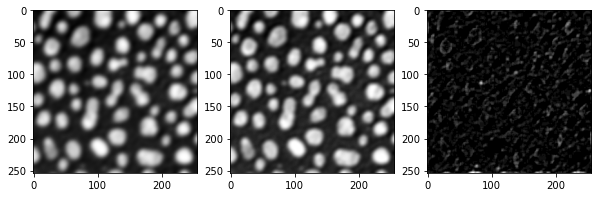

In [6]:
feature_stack = apoc.generate_feature_stack(image, "gaussian_blur=3 mean_box=3 top_hat_box=3")

visualize(feature_stack)

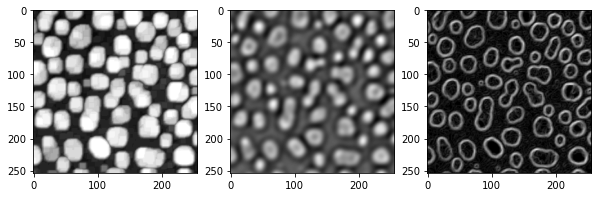

In [7]:
feature_stack = apoc.generate_feature_stack(image, "maximum_box=3 difference_of_gaussian=5 sobel=0")

visualize(feature_stack)

你还可以改变特征的半径/sigma值：

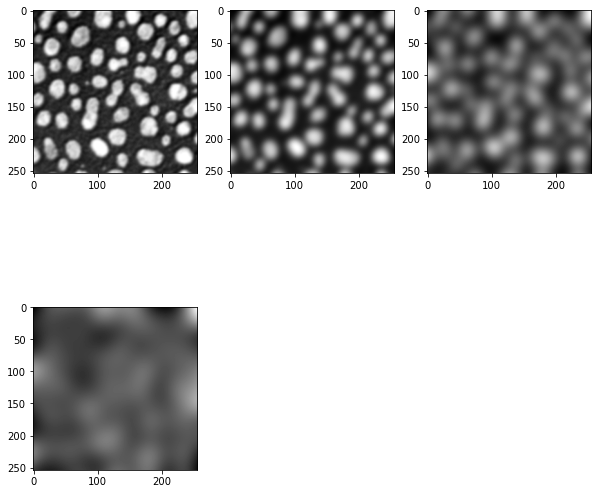

In [8]:
feature_stack = apoc.generate_feature_stack(image, "gaussian_blur=1 gaussian_blur=5 gaussian_blur=10 gaussian_blur=20")

visualize(feature_stack)

此外，一些特征可以组合，例如你可以计算高斯的sobel或高斯的拉普拉斯

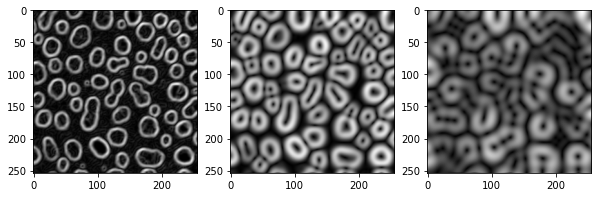

In [9]:
feature_stack = apoc.generate_feature_stack(image, "sobel_of_gaussian_blur=1 sobel_of_gaussian_blur=5 sobel_of_gaussian_blur=10")

visualize(feature_stack)

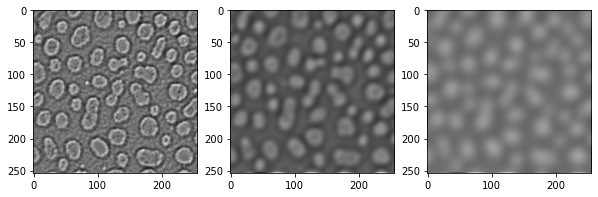

In [10]:
feature_stack = apoc.generate_feature_stack(image, "laplace_box_of_gaussian_blur=1 laplace_box_of_gaussian_blur=5 laplace_box_of_gaussian_blur=10")

visualize(feature_stack)